In [1]:
import pandas as pd
import numpy as np
import os
import sys
import argparse
import torch
from transformers import AutoModelForSpeechSeq2Seq, AutoProcessor, pipeline
from datasets import load_dataset
from jiwer import Compose, RemoveEmptyStrings, ToLowerCase, RemoveMultipleSpaces, Strip, RemovePunctuation, ReduceToListOfListOfWords
from utils.evaluation_utils import create_dataloaders, DataCollatorSpeechSeq2SeqWithPadding, calculate_and_store_metrics, clean_entities
from tqdm import tqdm
import pandas as pd
import os 

# 1. Benchmark hur distrubutionen ser ut i utvärderingsset
# 2. Benchmark hur distrubutionen ser ut efter fine-tuning




/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-05-12 10:49:10.048337: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('results/final_sentences.csv')

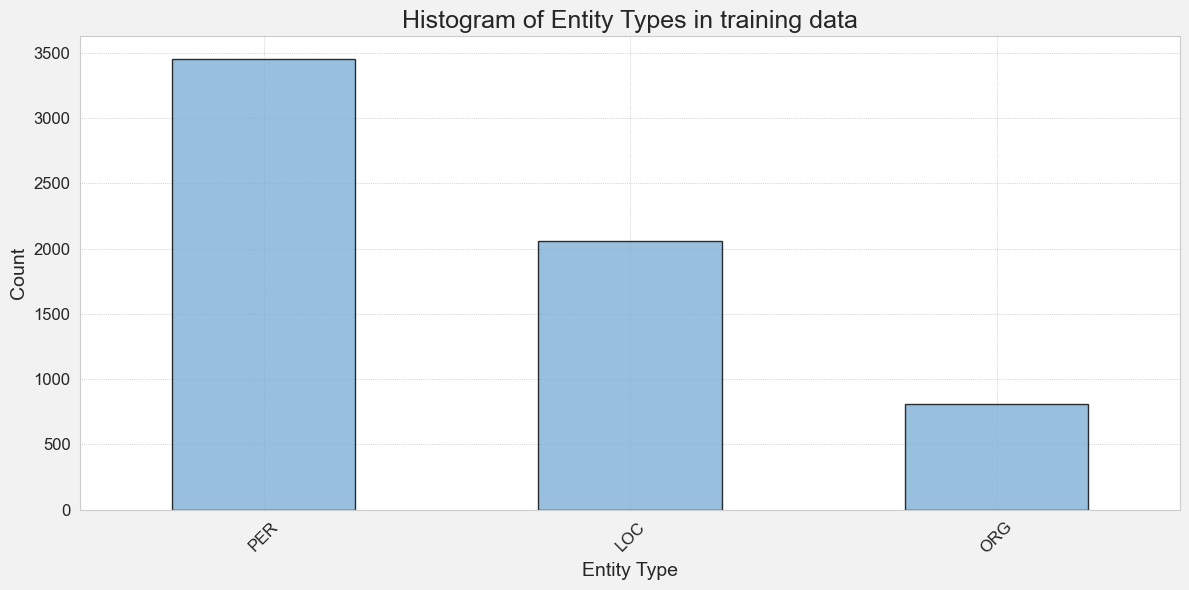

In [10]:
import seaborn as sns

import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6), facecolor="#f2f2f2")
plt.rcParams["font.size"] = 10

# Plot entity type counts as a bar chart
df['entity_type'].value_counts().plot(kind='bar', color="#7eb0d5", edgecolor="black", alpha=0.8)

plt.xlabel("Entity Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Histogram of Entity Types in training data", fontsize=18)
plt.grid(color="gray", linestyle="dotted", linewidth=0.5, alpha=0.6)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

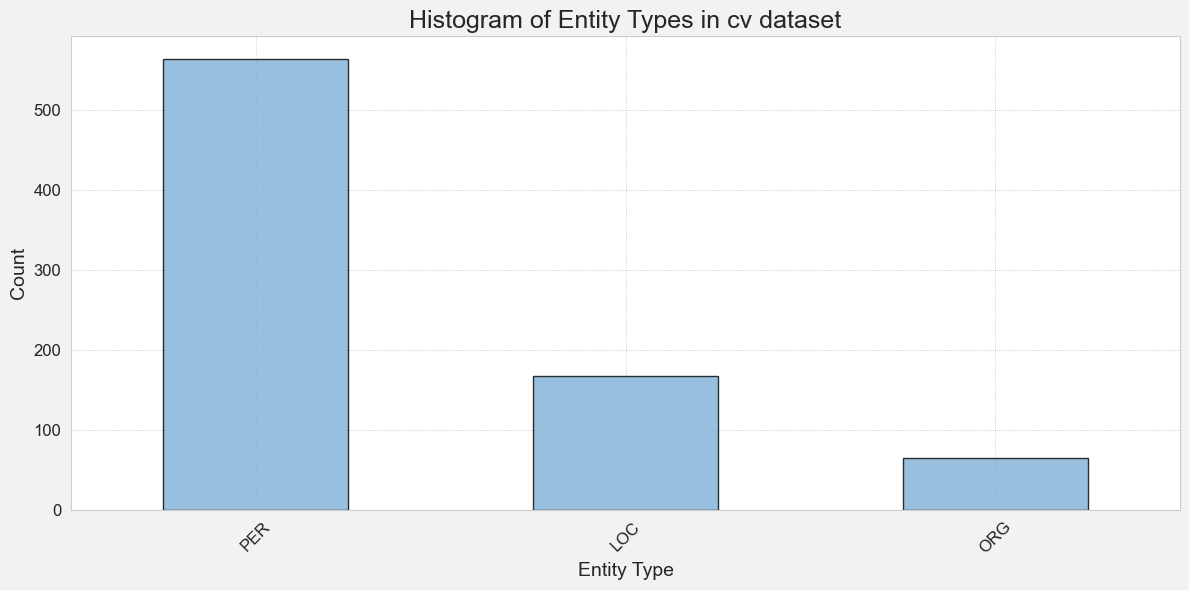

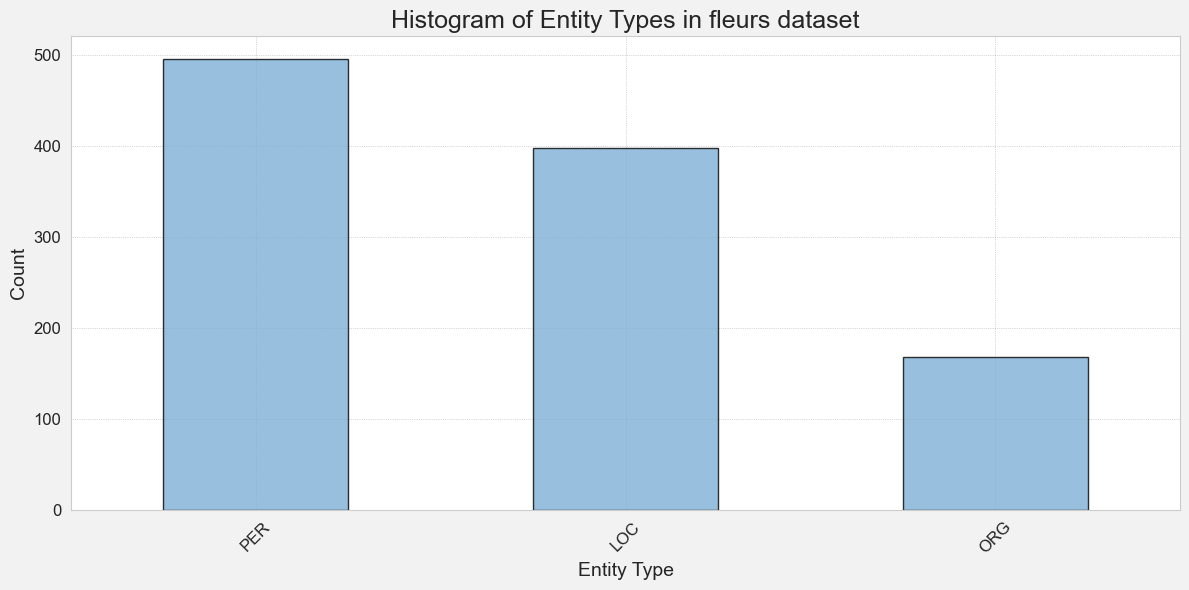

In [15]:
datasets = ['cv', 'fleurs']

for dataset in datasets:
    df_missed_entities = pd.read_csv(f'results/missed_entities_not_norm_entities_benchmark_{dataset}_small.csv')
    df_missed_entities = df_missed_entities[df_missed_entities['type'].isin(['PER', 'LOC', 'ORG'])]

    # Plot entity type counts as a bar chart
    plt.figure(figsize=(12, 6), facecolor="#f2f2f2")
    df_missed_entities['type'].value_counts().plot(kind='bar', color="#7eb0d5", edgecolor="black", alpha=0.8)
    plt.xlabel("Entity Type", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.title(f"Histogram of Entity Types in {dataset} dataset", fontsize=18)
    plt.grid(color="gray", linestyle="dotted", linewidth=0.5, alpha=0.6)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()


